# 2. System and Filter Fundamentals
This module covers the core concepts of signal processing systems, particularly focusing on Linear Time-Invariant (LTI) systems and digital filter design, which are crucial for processing biomedical signals.

## 2.1. Basic System Definitions and Properties
A System is an entity that produces a response (output) based on an excitation (input) and initial conditions.
#### 2.1.1. System Classification

This table outlines the essential properties used to categorize systems.

| Property | Description | Key Condition/Test |
| :--- | :--- | :--- |
| **Linearity** | The system satisfies **superposition**. | $T\{\alpha x_1(t) + \beta x_2(t)\} = \alpha y_1(t) + \beta y_2(t)$ |
| **Time-Invariance (TI)** | The system's rules or behavior **do not change** over time. | $x(t) \to y(t) \implies x(t - t_0) \to y(t - t_0)$ |
| **Causality** | The system's output depends **only on the present and past inputs**. | $y[n]$ depends only on $x[k]$ for $k \le n$. |
| **Stability (BIBO)** | **Bounded Input, Bounded Output.** If the input is finite, the output must also be finite. | $|x(t)| < M \implies |y(t)| < N$ (where $M, N < \infty$) |
| **Memory** | The output depends on inputs from **past or future** moments. | $y[n]$ depends on $x[k]$ for $k \ne n$. |
| **Invertibility** | The **original input can be reconstructed** from the output. | An inverse system $T^{-1}$ exists such that $T^{-1}\{y(t)\} = x(t)$ |

---

### 2.2. LTI Systems (Linear Time-Invariant Systems)

LTI systems are central to signal processing because they are fully characterized by the **Impulse Response**.

#### 2.2.1. Convolution and Impulse Response
* The output ($y$) of an LTI system is found by **Convolving** the input ($x$) with the system's **Impulse Response** ($h$).
    * **Discrete-Time Convolution:**
    $$y[n] = x[n] * h[n] = \sum_{k=-\infty}^{+\infty} x[k] h[n-k]$$

#### 2.2.2. LTI Analysis in the Frequency Domain
* **The Convolution Property:** Convolution in the time domain becomes simple multiplication in the frequency domain.
    $$Y(e^{j\omega}) = X(e^{j\omega}) H(e^{j\omega})$$
* **Transfer Function ($H$):** The ratio $H(e^{j\omega}) = Y(e^{j\omega}) / X(e^{j\omega})$. It represents the system's behavior and is independent of the input signal.

---

### 2.3. Filters: Introduction and Types
Filters are LTI systems specifically designed to modify the frequency content of a signal (e.g., remove noise).

#### 2.3.1. Filter Action
* The **Magnitude Response $|H(\omega)|$** dictates the gain applied to each frequency component.
* The **Phase Response $\angle H(\omega)$** dictates the time delay applied to each frequency component.

#### 2.3.2. Frequency Selective Filters

| Filter Type | Function | Application Example |
| :--- | :--- | :--- |
| **Low-Pass Filter (LPF)** | Passes low frequencies, rejects high frequencies. | Smoothing a signal; removing high-frequency EMG noise. |
| **High-Pass Filter (HPF)** | Passes high frequencies, rejects low frequencies. | Removing **baseline wander** (drift) from an ECG signal. |
| **Band-Pass Filter (BPF)** | Passes a specific range (band) of frequencies. | Isolating the **Alpha rhythm** ($\sim 8-13 \text{ Hz}$) in EEG. |
| **Band-Reject/Notch Filter** | Rejects a narrow band of frequencies. | Eliminating $50 \text{ Hz}$ or $60 \text{ Hz}$ **powerline interference**. |

---

### 2.4. Digital Filter Design Approaches
Digital filters are classified based on the structure that defines their Impulse Response.

#### 2.4.1. Filter Types: FIR vs. IIR

| Feature | FIR (Finite Impulse Response) | IIR (Infinite Impulse Response) |
| :--- | :--- | :--- |
| **Structure** | Non-recursive (Feed-forward only). | Recursive (Includes feedback). |
| **Stability** | **Always Stable**. | Can be unstable (poles must be inside the unit circle). |
| **Phase** | Can achieve **Linear Phase** (no signal distortion). | Generally has **Non-linear Phase** (phase distortion). |
| **Order/Efficiency**| Requires high order for sharp response (less efficient). | Requires lower order for sharp response (more efficient). |

#### 2.4.2. Design Approach 1: IIR Filter Design (Analog Prototype)
* Uses well-established analog filter designs (**Butterworth**, **Chebyshev**) and converts them to digital using methods like the **Bilinear Transformation**.

#### 2.4.3. Design Approach 2: FIR Filter Design (Windowing Method)
* Starts with the ideal filter impulse response ($h_d[n]$) and **truncates** it by multiplying it with a **window function** ($w[n]$) to make it finite and realizable.
    $$h[n] = h_d[n] \cdot w[n]$$
* **Trade-off:** The choice of window (e.g., Rectangular, Hamming, Kaiser) balances the **transition bandwidth** (sharpness) against the **stopband ripple** (attenuation quality).

## Python Examples: System and Filter Fundamentals
### Example 1: Convolution (LTI System Output)
This code reinforces the core concept that the output of an LTI system is the convolution of the input signal with the system's impulse response. We use a basic 5-point moving average filter.

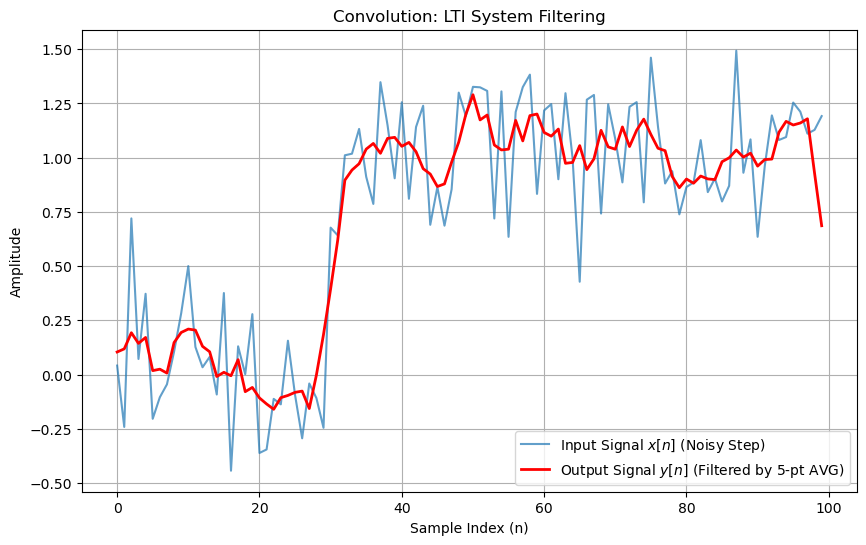

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Define Input Signal
N = 100
n = np.arange(N)
x = np.zeros(N)
x[30:] = 1.0  # Step
x += 0.5 * np.random.normal(0, 0.5, N)  # Add noise

# Define Impulse Response h[n]: 5-point Moving Average Filter (FIR)
M = 5
h = np.ones(M) / M 

#  Perform Convolution (Calculate System Output y[n])
y = convolve(x, h, mode='same')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n, x, label='Input Signal $x[n]$ (Noisy Step)', alpha=0.7)
plt.plot(n, y, label=f'Output Signal $y[n]$ (Filtered by {M}-pt AVG)', color='red', linewidth=2)
plt.title('Convolution: LTI System Filtering')
plt.xlabel('Sample Index (n)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Example 2: FIR vs. IIR Filter Design (LPF)
This code compares the two major digital filter design approaches: FIR (using the windowing method) and IIR (using the Butterworth analog prototype), both designed as Low-Pass Filters (LPFs).

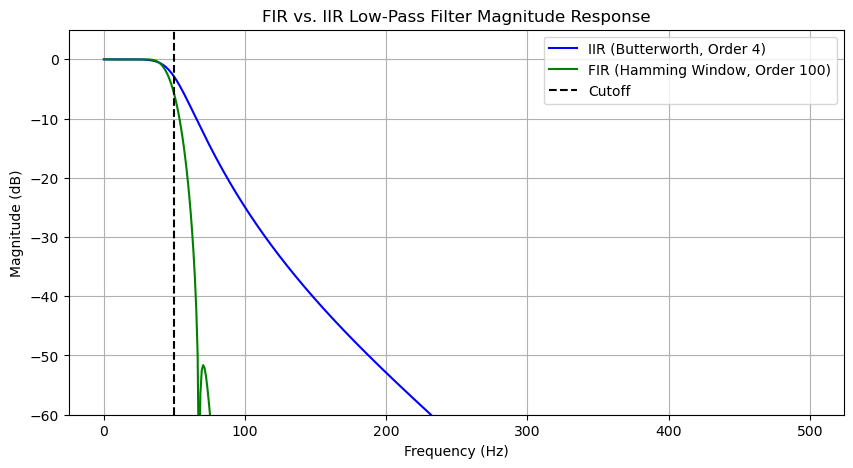

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, firwin, freqz, lfilter

fs = 1000  # Sampling frequency (Hz)
cutoff_freq = 50  # Cutoff frequency (Hz)
nyquist = fs / 2
normalized_cutoff = cutoff_freq / nyquist

# Uses analog prototype transformation (efficient, non-linear phase)
order_iir = 4
b_iir, a_iir = butter(order_iir, normalized_cutoff, btype='low', analog=False)

# Uses windowing (linear phase, higher order needed)
order_fir = 100 # Higher order for similar steepness
b_fir = firwin(order_fir, normalized_cutoff, window='hamming')
a_fir = 1.0 # FIR filters are all-zero, so a_fir is just 1.0

w_iir, h_iir = freqz(b_iir, a_iir, fs=fs)
w_fir, h_fir = freqz(b_fir, a_fir, fs=fs)

plt.figure(figsize=(10, 5))
plt.plot(w_iir, 20 * np.log10(abs(h_iir)), label='IIR (Butterworth, Order 4)', color='blue')
plt.plot(w_fir, 20 * np.log10(abs(h_fir)), label=f'FIR (Hamming Window, Order {order_fir})', color='green')
plt.title('FIR vs. IIR Low-Pass Filter Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.axvline(cutoff_freq, color='k', linestyle='--', label='Cutoff')
plt.ylim([-60, 5])
plt.legend()
plt.grid(which='both', axis='both')
plt.show()


## Example 3: Notch Filter (Powerline Noise Removal) 
The Notch Filter is essential in biomedical processing to eliminate powerline interference (50 Hz or 60 Hz) without affecting nearby signal frequencies.

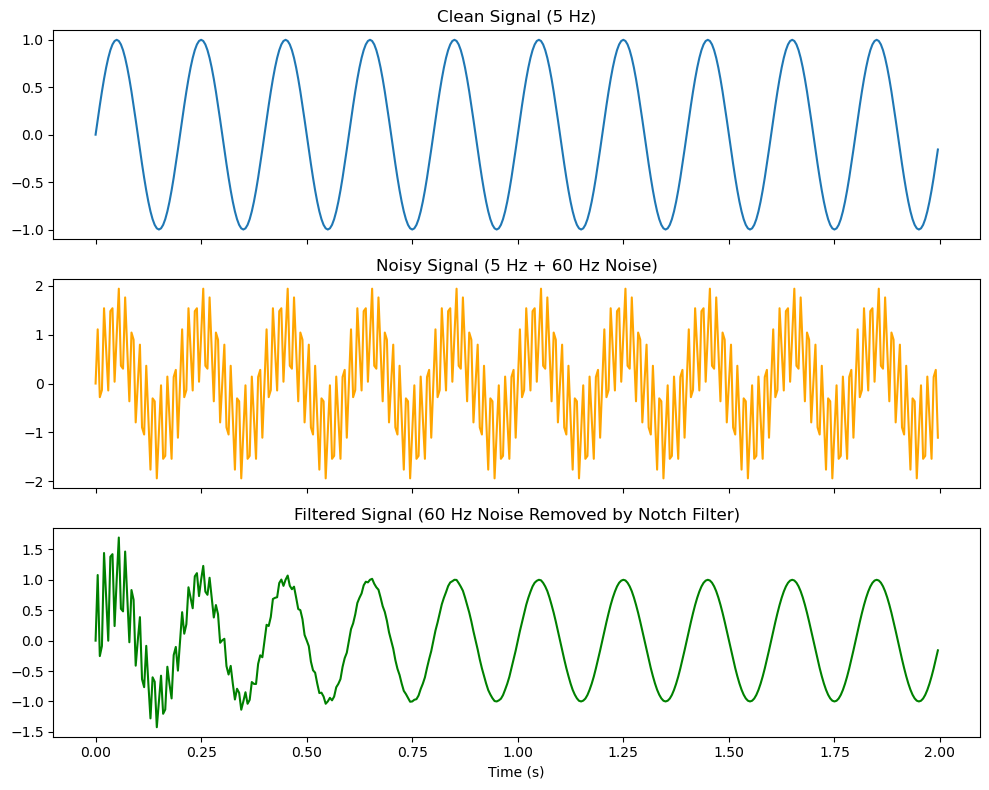

In [15]:
from scipy.signal import iirnotch
# Define Parametrs
fs = 200 #sampling rate
f0 = 60 # Noise frequency
Q = 35 # Quality factor
N = 400 # Number of samples

# Design IIR notch filter
normalized_f0 = f0 / (fs / 2)
b_notch, a_notch = iirnotch(normalized_f0, Q)

# Create a Noisy Signal like ECG
t = np.arange(N) /  fs
clean_signal = np.sin(2*np.pi*5*t) # 5 HZ base signal 
noise_60hz = 1.0 * np.sin(2 * np.pi * 60 * t) # Large 60 Hz noise component
noisy_signal = clean_signal + noise_60hz

# Apply the Filter
filtered_signal = lfilter(b_notch, a_notch, noisy_signal)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10,8), sharex=True )

axes[0].plot(t, clean_signal)
axes[0].set_title('Clean Signal (5 Hz)')

axes[1].plot(t, noisy_signal, color='orange')
axes[1].set_title(f'Noisy Signal (5 Hz + {f0} Hz Noise)')

axes[2].plot(t, filtered_signal, color='green')
axes[2].set_title(f'Filtered Signal (60 Hz Noise Removed by Notch Filter)')

plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()